<a href="https://colab.research.google.com/github/namekridchai/prediskCustomerFinancialrisk/blob/main/predictRisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


In [ ]:
iris = pd.read_csv('real.csv')
iris.head()

,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status,Bachelor,Doctorate,Master,Others,BestJob,GoodWork,DecentWork,WSD,Married,Separate,Rural,Urban,Semi
0,83000,Doctorate,0,Divorced,Self-employed,1,Urban,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0
1,94000,Doctorate,0,Divorced,Self-employed,1,Urban,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,117000,Doctorate,0,Divorced,Self-employed,1,Urban,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,154000,Doctorate,1,Divorced,Self-employed,1,Urban,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0
4,95000,Doctorate,0,Married,Self-employed,1,Semi-urban,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
iris.isna().sum()

Income               0
Education            0
Dependents           0
Marital Status       0
Employment Status    0
Mortgage             0
Resident             0
Credit               0
Risk Status          0
Bachelor             0
Doctorate            0
Master               0
Others               0
BestJob              0
GoodWork             0
DecentWork           0
WSD                  0
Married              0
Separate             0
Rural                0
Urban                0
Semi                 0
dtype: int64

In [ ]:
iris.pop("Education")
iris.pop("Employment Status")
iris.pop("Marital Status")
iris.pop("Resident")




0            Urban
1            Urban
2            Urban
3            Urban
4       Semi-urban
           ...    
2791         Rural
2792    Semi-urban
2793    Semi-urban
2794         Rural
2795         Rural
Name: Resident, Length: 2796, dtype: object

In [ ]:
iris.head()

,Income,Dependents,Mortgage,Credit,Risk Status,Bachelor,Doctorate,Master,Others,BestJob,GoodWork,DecentWork,WSD,Married,Separate,Rural,Urban,Semi
0,83000,0,1,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0
1,94000,0,1,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,117000,0,1,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,154000,1,1,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0
4,95000,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1


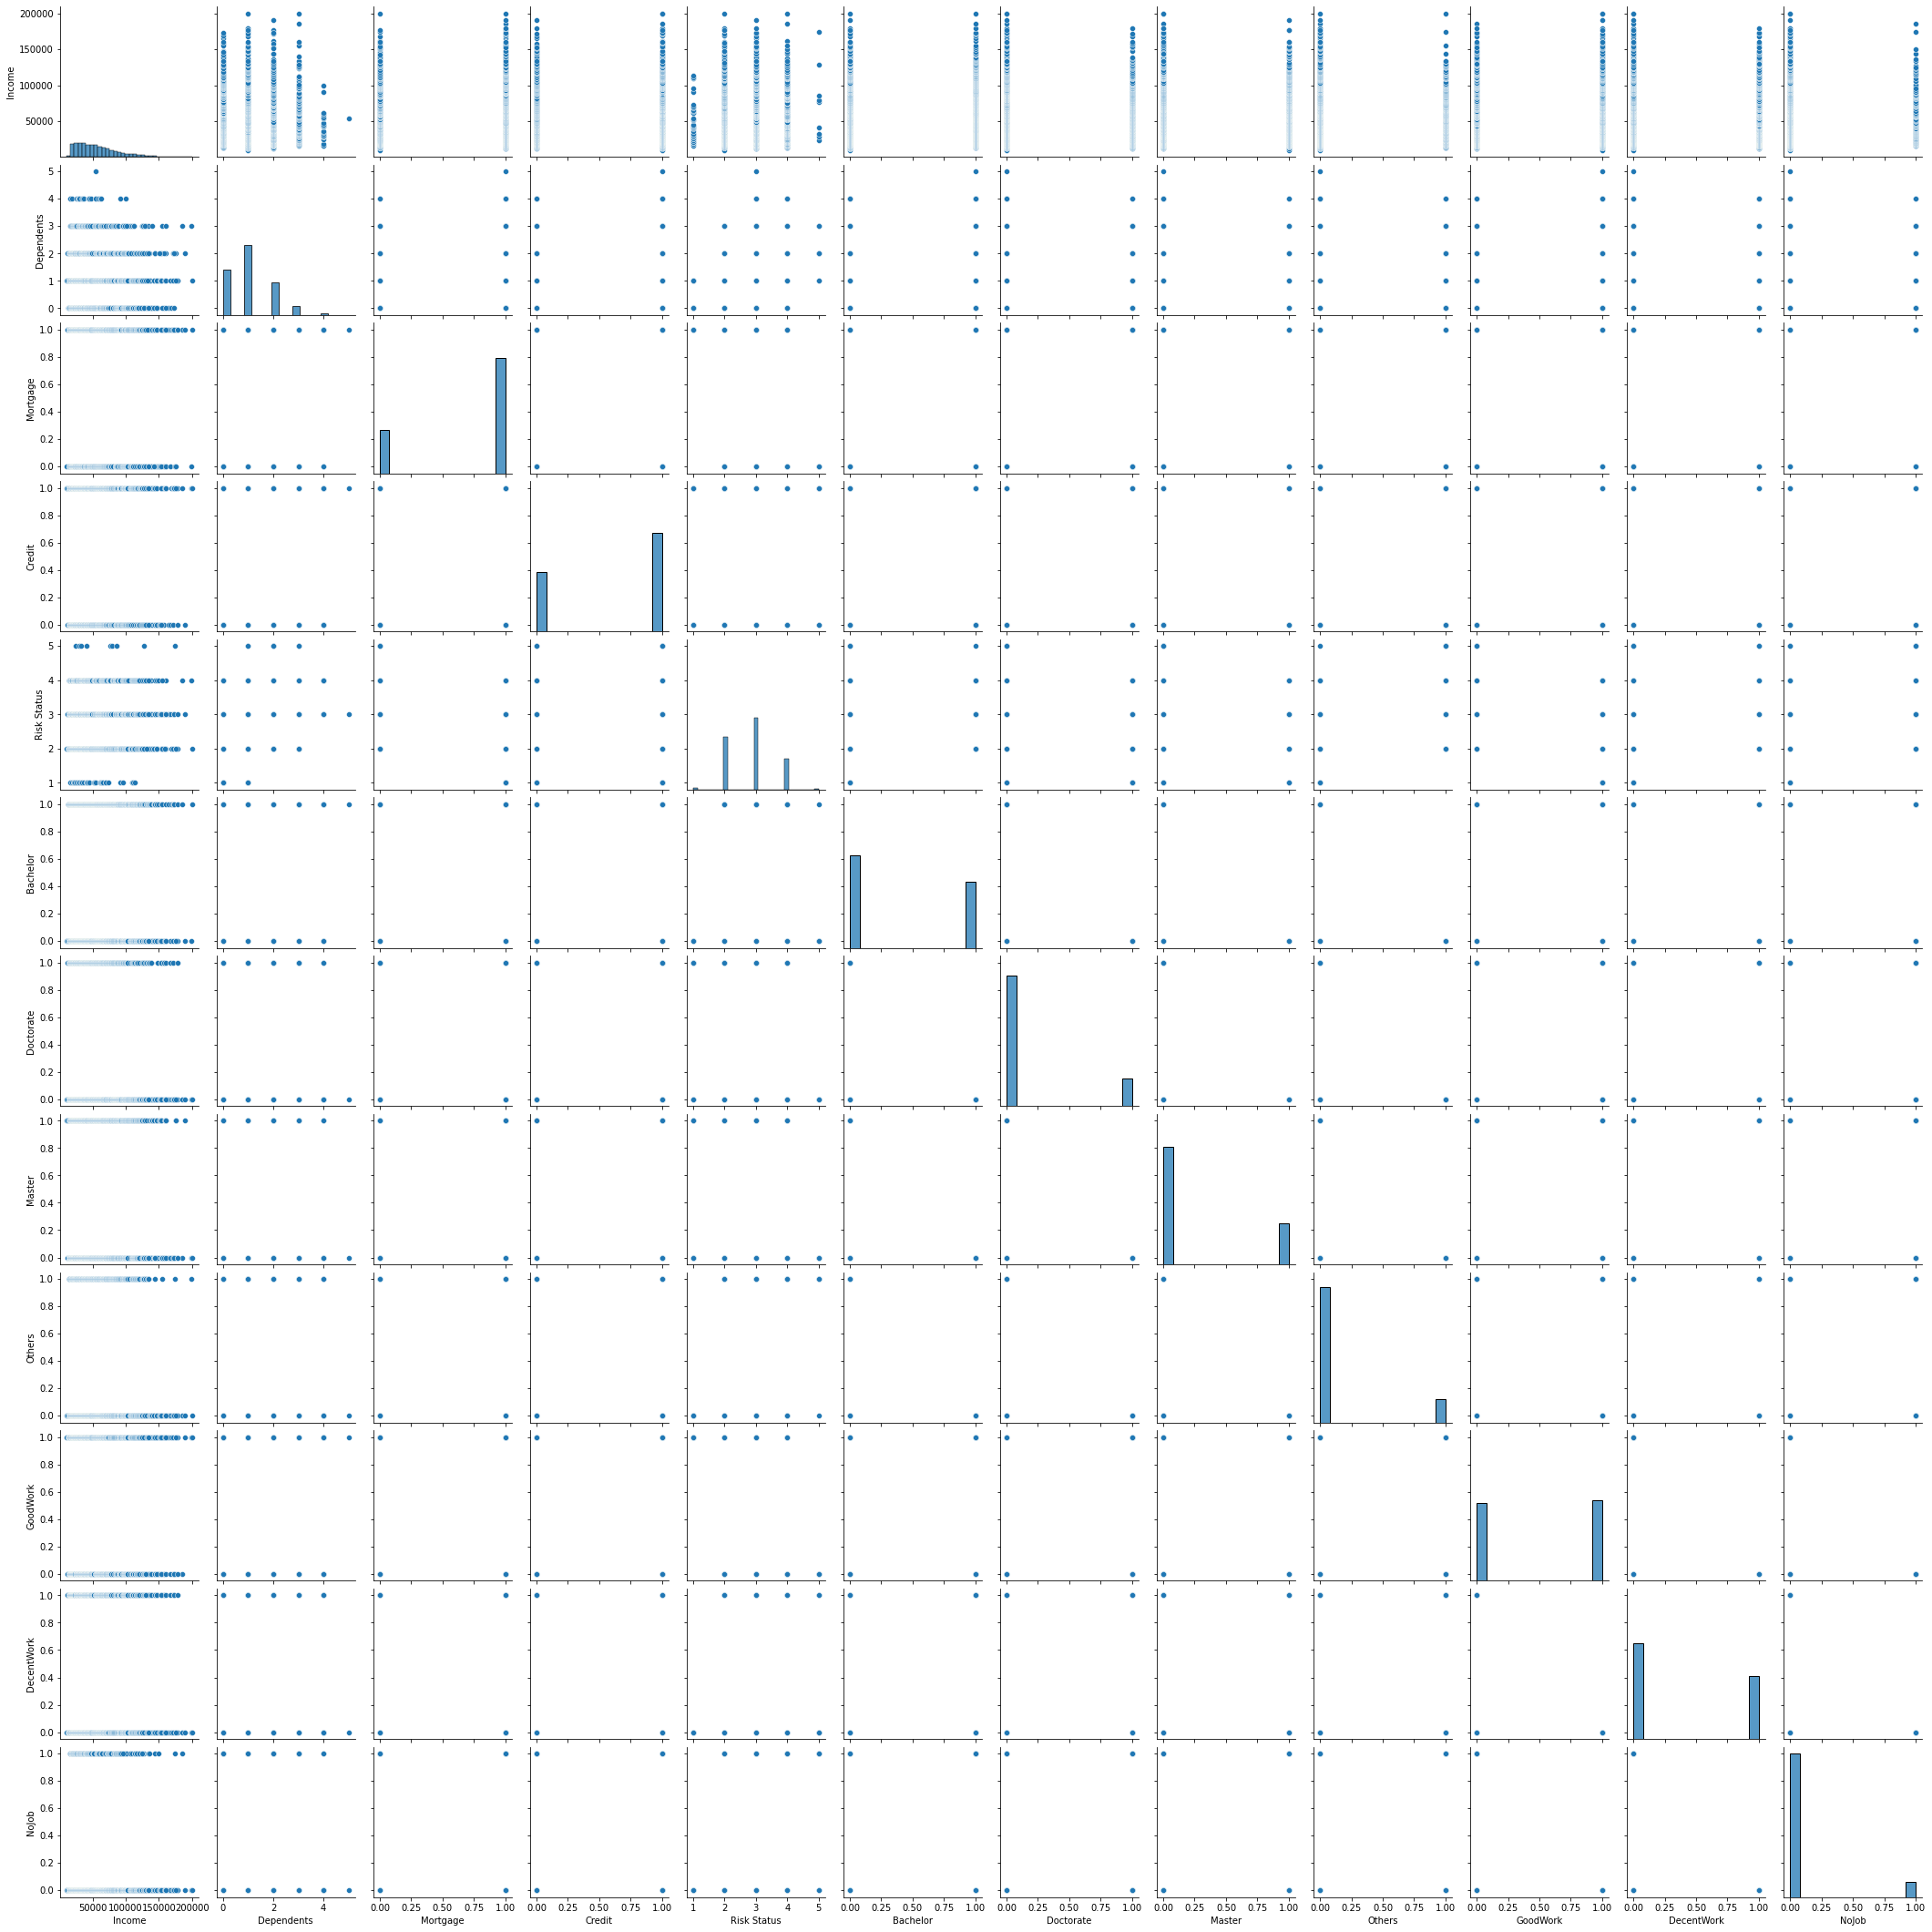

In [ ]:
sns.pairplot(iris)

In [ ]:
 train_dataset = iris.sample(frac = 0.8,random_state= 1)

 test_dataset = iris.drop(train_dataset.index)

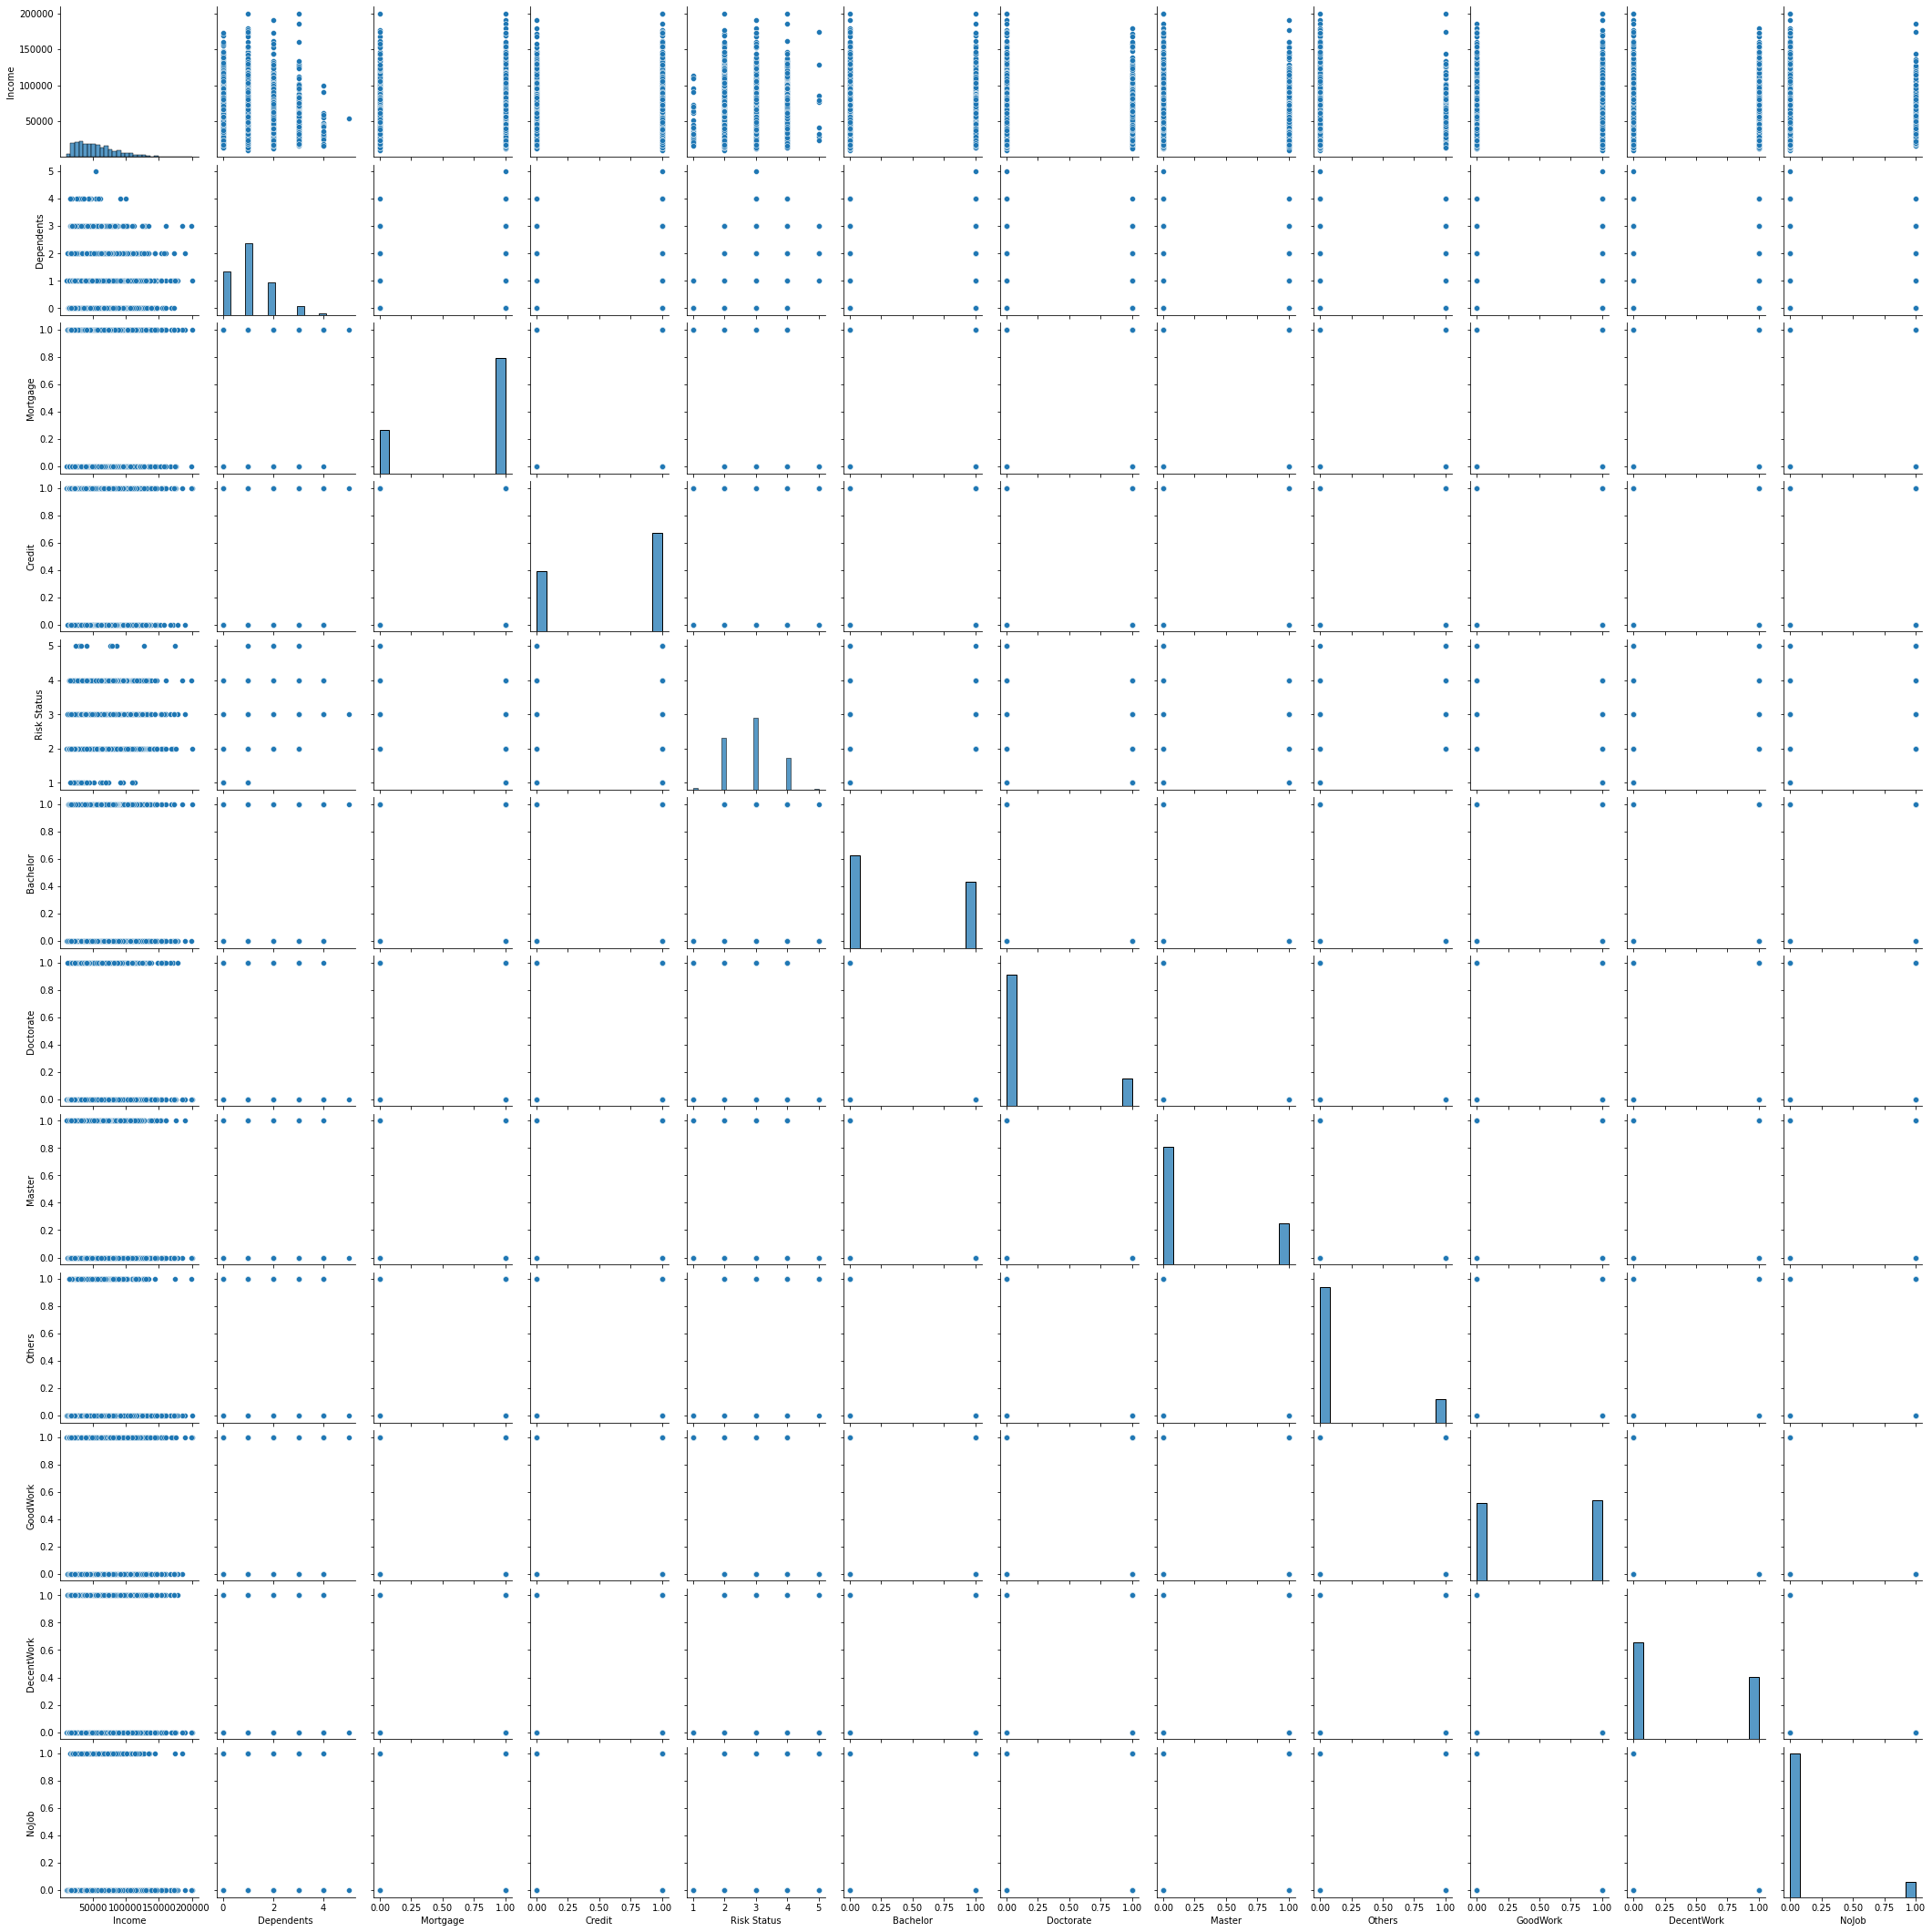

In [ ]:
sns.pairplot(train_dataset)

In [ ]:
y_train = train_dataset['Risk Status']

y_test = test_dataset['Risk Status']

train_dataset.pop("Risk Status")

test_dataset.pop("Risk Status")

train_dataset['Income'] = train_dataset['Income']/200000

test_dataset['Income'] = test_dataset['Income']/200000


In [ ]:
y_train_array = y_train.to_numpy()
train_dataset_array = train_dataset.to_numpy()
test_dataset_array = test_dataset.to_numpy()

In [ ]:
train_dataset_array[0].shape

(17,)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (17,)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))


model.add(tf.keras.layers.Dense(6,activation='softmax'))
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),metrics=['accuracy'])

In [ ]:
train_dataset_array.shape,y_train_array.shape

((2237, 17), (2237,))

In [ ]:
model.fit(train_dataset_array,y_train_array,epochs=70,batch_size=1000)

Epoch 1/70
3/3 [==============================] - 0s 4ms/step - loss: 1.5822 - accuracy: 0.3684
Epoch 2/70
3/3 [==============================] - 0s 4ms/step - loss: 1.3942 - accuracy: 0.5145
Epoch 3/70
3/3 [==============================] - 0s 4ms/step - loss: 1.2478 - accuracy: 0.5740
Epoch 4/70
3/3 [==============================] - 0s 4ms/step - loss: 1.1397 - accuracy: 0.5597
Epoch 5/70
3/3 [==============================] - 0s 7ms/step - loss: 1.0625 - accuracy: 0.5700
Epoch 6/70
3/3 [==============================] - 0s 4ms/step - loss: 1.0032 - accuracy: 0.6075
Epoch 7/70
3/3 [==============================] - 0s 4ms/step - loss: 0.9515 - accuracy: 0.6424
Epoch 8/70
3/3 [==============================] - 0s 4ms/step - loss: 0.9052 - accuracy: 0.6410
Epoch 9/70
3/3 [==============================] - 0s 4ms/step - loss: 0.8632 - accuracy: 0.6553
Epoch 10/70
3/3 [==============================] - 0s 5ms/step - loss: 0.8252 - accuracy: 0.6835
Epoch 11/70
3/3 [======================

In [ ]:
np.argmax(model.predict(test_dataset_array)[2])

3

In [ ]:
loss,accuracy = model.evaluate(test_dataset_array,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 0.2199 - accuracy: 0.9052


In [ ]:
y_train_array[2]

3

In [ ]:
y_train_array.shape

(2238,)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_predict = np.argmax(model.predict(test_dataset_array),axis = 1)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.75      0.60      0.67         5
           2       0.96      0.93      0.94       199
           3       0.88      0.93      0.90       245
           4       0.88      0.83      0.85       109
           5       0.00      0.00      0.00         1

    accuracy                           0.91       559
   macro avg       0.69      0.66      0.67       559
weighted avg       0.90      0.91      0.90       559



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
data = pd.read_csv('real_test.csv')
data.head()

,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status,Bachelor,Doctorate,Master,Others,BestJob,GoodWork,DecentWork,WSD,Married,Separate,Rural,Urban,Semi
0,51000,Bachelor,1,Married,Others,1,Semi-urban,0,NaN,1,0,0,0,0,1,0,0,1,0,0,0,1
1,48000,Master,2,Widowed,Employed,1,Urban,1,NaN,0,0,1,0,1,0,0,1,0,0,0,1,0
2,26000,Others,2,Married,Part-time,1,Urban,0,NaN,0,0,0,1,0,1,0,0,1,0,0,1,0
3,32000,Others,1,Separated,Others,1,Urban,0,NaN,0,0,0,1,0,1,0,0,0,1,0,1,0
4,110000,Doctorate,1,Single,Employed,0,Semi-urban,1,NaN,0,1,0,0,1,0,0,1,0,0,0,0,1


In [ ]:
data.pop("Education")
data.pop("Employment Status")
data.pop("Marital Status")
data.pop("Resident")
data.pop("Risk Status")

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
345   NaN
346   NaN
347   NaN
348   NaN
349   NaN
Name: Risk Status, Length: 350, dtype: float64

In [ ]:
data.head()

,Income,Dependents,Mortgage,Credit,Bachelor,Doctorate,Master,Others,BestJob,GoodWork,DecentWork,WSD,Married,Separate,Rural,Urban,Semi
0,51000,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1
1,48000,2,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0
2,26000,2,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0
3,32000,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0
4,110000,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1


In [ ]:
data['Income'] = data['Income']/200000

data_array = data.to_numpy()

real_predict = np.argmax(model.predict(data_array),axis = 1)

In [ ]:
real_predict.shape

(350,)

In [ ]:
answer = pd.read_csv('answer.csv')
answer.head()
  

,Gender,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status
0,Male,51000,Bachelor,1,Married,Others,Yes,Semi-urban,No,NaN
1,Male,48000,Master,2,Widowed,Employed,Yes,Urban,Yes,NaN
2,Female,26000,Others,2,Married,Part-time,Yes,Urban,No,NaN
3,Female,32000,Others,1,Separated,Others,Yes,Urban,No,NaN
4,Male,110000,Doctorate,1,Single,Employed,No,Semi-urban,Yes,NaN


In [ ]:
answer['Income'][0],answer['Income'][1],answer['Income'][2]

(51000, 48000, 26000)

In [ ]:
for i in range(350):
  answer['Risk Status'][i] = real_predict[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
answer

,Gender,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status
0,Male,51000,Bachelor,1,Married,Others,Yes,Semi-urban,No,3.0
1,Male,48000,Master,2,Widowed,Employed,Yes,Urban,Yes,2.0
2,Female,26000,Others,2,Married,Part-time,Yes,Urban,No,4.0
3,Female,32000,Others,1,Separated,Others,Yes,Urban,No,3.0
4,Male,110000,Doctorate,1,Single,Employed,No,Semi-urban,Yes,2.0
...,...,...,...,...,...,...,...,...,...,...
345,Male,66000,Doctorate,1,Divorced,Self-employed,Yes,Semi-urban,Yes,2.0
346,Female,52000,Bachelor,0,Single,Employed,Yes,Urban,Yes,2.0
347,Female,23000,Others,0,Single,Others,Yes,Semi-urban,Yes,4.0
348,Female,16000,Master,3,Married,Others,Yes,Rural,Yes,4.0


In [ ]:
answer['Risk Status'][5],answer['Risk Status'][6],answer['Risk Status'][7],answer['Risk Status'][8]

(2.0, 3.0, 4.0, 3.0)

In [ ]:
answer

,Gender,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status
0,Male,51000,Bachelor,1,Married,Others,Yes,Semi-urban,No,3.0
1,Male,48000,Master,2,Widowed,Employed,Yes,Urban,Yes,2.0
2,Female,26000,Others,2,Married,Part-time,Yes,Urban,No,4.0
3,Female,32000,Others,1,Separated,Others,Yes,Urban,No,3.0
4,Male,110000,Doctorate,1,Single,Employed,No,Semi-urban,Yes,2.0
...,...,...,...,...,...,...,...,...,...,...
345,Male,66000,Doctorate,1,Divorced,Self-employed,Yes,Semi-urban,Yes,2.0
346,Female,52000,Bachelor,0,Single,Employed,Yes,Urban,Yes,2.0
347,Female,23000,Others,0,Single,Others,Yes,Semi-urban,Yes,3.0
348,Female,16000,Master,3,Married,Others,Yes,Rural,Yes,4.0


In [ ]:
with pd.ExcelWriter('FinalAnswerJingJing.xlsx') as writer:
    answer.to_excel(writer, sheet_name="FinalAnswer")
  

In [ ]:
real_predict

array([3, 2, 4, 3, 2, 2, 3, 4, 3, 4, 3, 4, 3, 2, 4, 4, 3, 3, 4, 4, 3, 2,
       2, 2, 2, 3, 2, 3, 3, 3, 4, 3, 4, 3, 2, 4, 3, 3, 3, 4, 4, 3, 3, 2,
       3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 4, 4, 2, 3, 3, 2, 3,
       2, 4, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 4, 2, 2, 3, 2, 3, 4, 3,
       2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 4, 3, 2, 4, 4, 4, 3, 4, 4, 4,
       3, 3, 4, 4, 3, 2, 3, 3, 2, 3, 4, 3, 2, 2, 4, 3, 4, 3, 3, 2, 3, 3,
       2, 3, 2, 4, 3, 4, 3, 2, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 2,
       2, 2, 3, 2, 3, 2, 3, 4, 3, 3, 2, 3, 2, 2, 4, 2, 2, 3, 4, 3, 3, 3,
       3, 4, 2, 3, 4, 3, 4, 4, 4, 2, 3, 3, 3, 3, 4, 2, 2, 4, 2, 2, 4, 2,
       2, 3, 2, 4, 4, 2, 3, 4, 2, 4, 2, 3, 4, 2, 3, 4, 3, 4, 2, 4, 3, 2,
       3, 2, 3, 3, 3, 3, 4, 2, 3, 2, 4, 2, 3, 4, 2, 3, 4, 3, 4, 3, 4, 3,
       2, 4, 4, 2, 3, 4, 3, 4, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 4, 2, 2, 4,
       2, 2, 2, 2, 2, 4, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 2, 4,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 4,